# 1.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
R = np.random.default_rng(1)
binom_sample = R.binomial(10, 1/3, size=100)
binom_sample[:10], len(binom_sample)

(array([3, 6, 2, 6, 3, 3, 5, 3, 3, 1], dtype=int64), 100)

# 2.)

In [3]:
sample_std = binom_sample.std()
sample_mean = binom_sample.mean()
sample_std, sample_mean

(1.4398263784220653, 3.37)

Text(0.5, 1.0, 'Frequencies of numbers in the data sample')

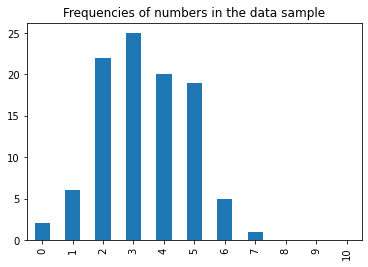

In [4]:
pd.Series(binom_sample).value_counts().sort_index().reindex(range(0, 11)).plot.bar()
plt.title("Frequencies of numbers in the data sample")

# 3.)

In [5]:
pvals = pd.Series(binom_sample).value_counts(normalize=True).sort_index()
pvals

0    0.02
1    0.06
2    0.22
3    0.25
4    0.20
5    0.19
6    0.05
7    0.01
dtype: float64

In [6]:
bootstraps = [R.multinomial(n=1, pvals=pvals, size=len(binom_sample)).argmax(axis=1) for r in range(1000)]
std_estimates = [np.std(b) for b in bootstraps]
std_estimates[:10], len(std_estimates)

([1.4428790663115185,
  1.3091600360536522,
  1.4378803844548405,
  1.4703400967123217,
  1.438714704171748,
  1.4662537297480271,
  1.3240468269664785,
  1.412940196894405,
  1.460787458872782,
  1.5519020587653074],
 1000)

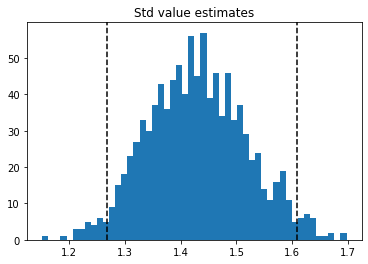

In [7]:
plt.hist(std_estimates, bins=50)
start_interval = np.quantile(std_estimates, 0.025)
end_interval = np.quantile(std_estimates, 0.975)
plt.axvline(start_interval, color="black", linestyle="dashed")
plt.axvline(end_interval, color="black", linestyle="dashed")
plt.title("Std value estimates")
plt.show()

In [8]:
"Interval: {:.2f}-{:.2f}".format(start_interval, end_interval)

'Interval: 1.27-1.61'

# 4.)

In [9]:
sample_std >= start_interval and sample_std <= end_interval

True

# 5.)

In [10]:
def bootsrap_data_check():
    data = R.binomial(10, 1/3, size=100)
    data_std = data.std()
    pvals = pd.Series(data).value_counts(normalize=True).sort_index()
    bootstraps = [R.multinomial(n=1, pvals=pvals, size=len(data)).argmax(axis=1) for r in range(1000)]
    std_estimates = [np.std(b) for b in bootstraps]
    std_estimates[:10], len(std_estimates)
    start_interval = np.quantile(std_estimates, 0.025)
    end_interval = np.quantile(std_estimates, 0.975)
    return data_std >= start_interval and data_std <= end_interval

In [11]:
success_count = 0
print_current_success = True
num_repetitions = 100
for i in range(num_repetitions):
    success_count += int(bootsrap_data_check())
    if print_current_success:
        print("Iteration {} : Sucess count: {}".format(i, success_count))
"Success rate: {:.2f} %".format((success_count / num_repetitions) * 100)

Iteration 0 : Sucess count: 1
Iteration 1 : Sucess count: 2
Iteration 2 : Sucess count: 3
Iteration 3 : Sucess count: 4
Iteration 4 : Sucess count: 5
Iteration 5 : Sucess count: 6
Iteration 6 : Sucess count: 7
Iteration 7 : Sucess count: 8
Iteration 8 : Sucess count: 9
Iteration 9 : Sucess count: 10
Iteration 10 : Sucess count: 11
Iteration 11 : Sucess count: 12
Iteration 12 : Sucess count: 13
Iteration 13 : Sucess count: 14
Iteration 14 : Sucess count: 15
Iteration 15 : Sucess count: 16
Iteration 16 : Sucess count: 17
Iteration 17 : Sucess count: 18
Iteration 18 : Sucess count: 19
Iteration 19 : Sucess count: 20
Iteration 20 : Sucess count: 21
Iteration 21 : Sucess count: 22
Iteration 22 : Sucess count: 23
Iteration 23 : Sucess count: 24
Iteration 24 : Sucess count: 25
Iteration 25 : Sucess count: 26
Iteration 26 : Sucess count: 27
Iteration 27 : Sucess count: 28
Iteration 28 : Sucess count: 29
Iteration 29 : Sucess count: 30
Iteration 30 : Sucess count: 31
Iteration 31 : Sucess count

'Success rate: 100.00 %'